In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Train test splitting
## Missing values handling
## Outliers handling
## encoding
## scaling


# import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
! pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.8
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.9.30.0.32.59
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread         

## train test split

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
X = df.drop(columns = ["charges"])
y = df["charges"]

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2,
                                       random_state = 42)
print(f"shape of X_train -: {X_train.shape}")
print(f"shape of X_test -: {X_test.shape}")
print(f"shape of y_train -: {y_train.shape}")
print(f"shape of y_test -: {y_test.shape}")

shape of X_train -: (1070, 6)
shape of X_test -: (268, 6)
shape of y_train -: (1070,)
shape of y_test -: (268,)


# missing values

In [ ]:
X_train.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0


In [ ]:
X_test.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0


In [ ]:
num_col = [col for col in X_train.columns if X_train[col].dtype != "object"]
cat_col = [col for col in X_train.columns if X_train[col].dtype == "object"]

In [ ]:
num_col

['age', 'bmi', 'children']

In [ ]:
cat_col

['sex', 'smoker', 'region']

In [ ]:
cat_col.append(num_col.pop(num_col.index("children")))

In [ ]:
num_col,cat_col

(['age', 'bmi'], ['sex', 'smoker', 'region', 'children'])

In [ ]:
mean_imputer = SimpleImputer(strategy = "mean")
mode_imputer = SimpleImputer(strategy = "most_frequent")


In [ ]:
X_train[num_col] = mean_imputer.fit_transform(X_train[num_col])
X_test[num_col] = mean_imputer.transform(X_test[num_col])

X_train[cat_col] = mode_imputer.fit_transform(X_train[cat_col])
X_test[cat_col] = mode_imputer.transform(X_test[cat_col])

## Outliers

In [ ]:
num_col

['age', 'bmi']

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1447: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.plot_data[axis] = cat_data
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

<Axes: >

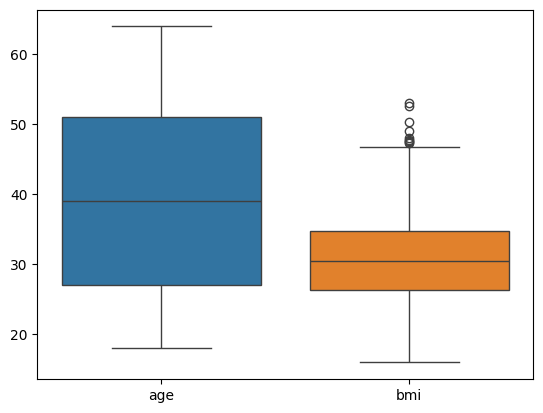

In [ ]:
sns.boxplot(df[num_col])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

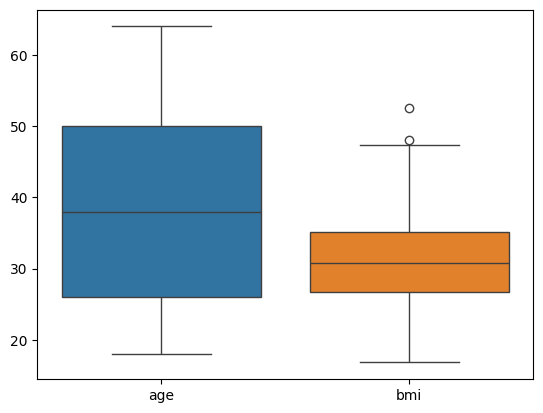

In [ ]:
sns.boxplot(X_test[num_col])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='charges'>

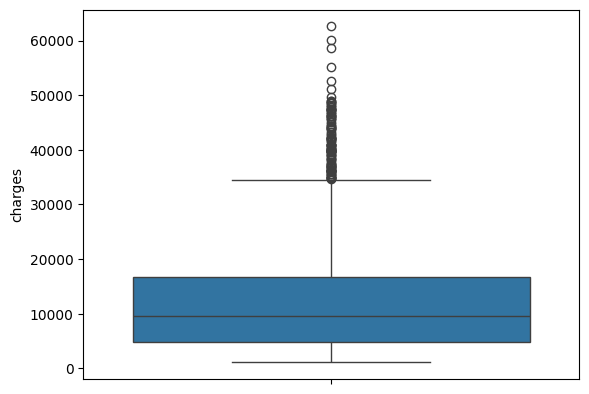

In [ ]:
sns.boxplot(y_train)

In [ ]:
def num_outlier(df, thresh = 0.25):
  num_col = [col for col in df.columns if df[col].dtype != "object"]
  result_dict = {}
  for col in num_col:
    if abs(df[col].skew()) > thresh:
      q1 = df[col].quantile(0.25)
      q3 = df[col].quantile(0.75)
      iqr = q3 - q1
      uw = q3 + 1.5*iqr
      lw = q1 - 1.5*iqr
      num_out = ((df[col] > uw) | (df[col] < lw)).sum()
      if num_out > 0:
        print(f"For {col} num_outliers are {num_out}")
        print(f"for {col} uw - {uw}, lw - {lw} with IQR method, skewness -{df[col].skew()}")
        print("----"*10)
      result_dict[col] = {"uw": uw, "lw":lw}
    else:
      uw = df[col].mean() + 3*df[col].std()
      lw = df[col].mean() - 3*df[col].std()
      num_out = ((df[col] > uw) | (df[col] < lw)).sum()
      if num_out > 0:
        print(f"For {col} num_outliers are {num_out}")
        print(f"for {col} uw - {uw}, lw - {lw} with Z_score method, skewness - {df[col].skew()}")
        print("----"*10)
      result_dict[col] = {"uw": uw, "lw":lw}
  return result_dict


In [ ]:
out_dict = num_outlier(X_train)

For bmi num_outliers are 6
for bmi uw - 46.93312500000001, lw - 13.76812499999999 with IQR method, skewness -0.2707966258877336
----------------------------------------


In [ ]:
num_outlier(X_test)

For bmi num_outliers are 2
for bmi uw - 47.993125000000006, lw - 13.878124999999997 with IQR method, skewness -0.3183183863995816
----------------------------------------


{'age': {'uw': 80.49966658928923, 'lw': -3.283248678841467},
 'bmi': {'uw': 47.993125000000006, 'lw': 13.878124999999997}}

In [ ]:
out_train_index = X_train[(X_train["bmi"]> out_dict["bmi"]["uw"]) |
                    (X_train["bmi"] < out_dict["bmi"]["lw"])].index

out_test_index = X_test[(X_test["bmi"]> out_dict["bmi"]["uw"]) |
                    (X_test["bmi"] < out_dict["bmi"]["lw"])].index

In [ ]:
X_train.drop(index = out_train_index, inplace = True)
y_train.drop(index = out_train_index, inplace = True)
X_test.drop(index = out_test_index, inplace = True)
y_test.drop(index = out_test_index, inplace = True)

In [ ]:
num_outlier(df)

For bmi num_outliers are 9
for bmi uw - 47.290000000000006, lw - 13.7 with IQR method, skewness -0.2840471105987448
----------------------------------------
For charges num_outliers are 139
for charges uw - 34489.350562499996, lw - -13109.1508975 with IQR method, skewness -1.5158796580240388
----------------------------------------


{'age': {'uw': 81.3569065487098, 'lw': -2.9428557265872257},
 'bmi': {'uw': 47.290000000000006, 'lw': 13.7},
 'children': {'uw': 5.0, 'lw': -3.0},
 'charges': {'uw': 34489.350562499996, 'lw': -13109.1508975}}

In [ ]:
result_df = pd.DataFrame({
    "method" :[],
    "train_mae":[],
    "test_mae": [],
    "train_r2":[],
    "test_r2":[]
})
result_df

,method,train_mae,test_mae,train_r2,test_r2


In [ ]:
def eval(method, X_train, X_test, y_train, y_test, result_df):
  model = LinearRegression()
  model.fit(X_train, y_train)
  # train_pred
  y_train_pred = model.predict(X_train)
  # test_pred
  y_test_pred = model.predict(X_test)

  #train_mae
  train_mae = round(mean_absolute_error(y_train, y_train_pred),3)
  #test_mae
  test_mae = round(mean_absolute_error(y_test, y_test_pred),3)

  #train r2
  train_r2 = round(r2_score(y_train, y_train_pred)*100, 2)
  test_r2 = round(r2_score(y_test, y_test_pred)*100, 2)
  temp_df = pd.DataFrame({
    "method" :[method],
    "train_mae":[train_mae],
    "test_mae": [test_mae],
    "train_r2":[train_r2],
    "test_r2":[test_r2]
    })
  result_df = pd.concat([result_df, temp_df]).reset_index(drop = True)
  return result_df



In [ ]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46.0,19.950,2,0.0,0.0,1.0,0.0,0.0
1285,47.0,24.320,0,0.0,0.0,0.0,0.0,0.0
1142,52.0,24.860,0,0.0,0.0,0.0,1.0,0.0
969,39.0,34.320,5,0.0,0.0,0.0,1.0,0.0
486,54.0,21.470,3,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1044,55.0,35.245,1,1.0,0.0,0.0,0.0,0.0
1095,18.0,31.350,4,0.0,0.0,0.0,0.0,0.0
1130,39.0,23.870,5,0.0,0.0,0.0,1.0,0.0
1294,58.0,25.175,0,1.0,0.0,0.0,0.0,0.0


In [ ]:
cat_col.pop()

'region'

In [ ]:
X_train

,age,sex,bmi,children,smoker,region
560,46.0,female,19.950,2,no,northwest
1285,47.0,female,24.320,0,no,northeast
1142,52.0,female,24.860,0,no,southeast
969,39.0,female,34.320,5,no,southeast
486,54.0,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1044,55.0,male,35.245,1,no,northeast
1095,18.0,female,31.350,4,no,northeast
1130,39.0,female,23.870,5,no,southeast
1294,58.0,male,25.175,0,no,northeast


In [ ]:
ohe = OneHotEncoder(sparse_output = False, handle_unknown = "ignore", drop = "first")

X_train[ohe.get_feature_names_out()] = ohe.fit_transform(X_train[cat_col])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[cat_col])

In [ ]:
X_train.drop(columns = cat_col, inplace = True)
X_test.drop(columns = cat_col, inplace = True)

In [ ]:
result_df = eval("baseline", X_train, X_test, y_train, y_test, result_df)
result_df

,method,train_mae,test_mae,train_r2,test_r2
0,baseline,4223.843,4141.553,74.21,77.89


In [ ]:
# standard_scaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

result_df = eval("baseline with standard scaling", X_train_std, X_test_std, y_train, y_test, result_df)
result_df

,method,train_mae,test_mae,train_r2,test_r2
0,baseline,4223.843,4141.553,74.21,77.89
1,baseline with standard scaling,4223.843,4141.553,74.21,77.89


In [ ]:
# min max_scaler
mm_scaler = MinMaxScaler()
X_train_std = mm_scaler.fit_transform(X_train)
X_test_std = mm_scaler.transform(X_test)

result_df = eval("baseline with mm scaling", X_train = X_train_std, X_test = X_test_std,
                 y_train = y_train, y_test = y_test, result_df = result_df)
result_df

,method,train_mae,test_mae,train_r2,test_r2
0,baseline,4223.843,4141.553,74.21,77.89
1,baseline with standard scaling,4223.843,4141.553,74.21,77.89
2,baseline with mm scaling,4223.843,4141.553,74.21,77.89


In [ ]:
result_df = eval("sqrt transformation", X_train, X_test, np.sqrt(y_train), np.sqrt(y_test), result_df)
result_df

,method,train_mae,test_mae,train_r2,test_r2
0,baseline,4223.843,4141.553,74.21,77.89
1,baseline with standard scaling,4223.843,4141.553,74.21,77.89
2,baseline with mm scaling,4223.843,4141.553,74.21,77.89
3,sqrt transformation,15.078,14.870,77.01,80.66


In [ ]:
result_df = eval("log transformation", X_train, X_test, np.log(y_train), np.log(y_test), result_df)
result_df

,method,train_mae,test_mae,train_r2,test_r2
0,baseline,4223.843,4141.553,74.21,77.89
1,baseline with standard scaling,4223.843,4141.553,74.21,77.89
2,baseline with mm scaling,4223.843,4141.553,74.21,77.89
3,sqrt transformation,15.078,14.870,77.01,80.66
4,log transformation,0.284,0.272,75.69,80.06


In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
y_train_pt = pt.fit_transform(np.expand_dims(y_train,axis = -1))
# y_train_pt
y_test_pt = pt.transform(np.expand_dims(y_test,axis = -1))

In [ ]:
result_df = eval("pt transformation", X_train, X_test, y_train_pt, y_test_pt, result_df)
result_df

,method,train_mae,test_mae,train_r2,test_r2
0,baseline,4223.843,4141.553,74.21,77.89
1,baseline with standard scaling,4223.843,4141.553,74.21,77.89
2,baseline with mm scaling,4223.843,4141.553,74.21,77.89
3,sqrt transformation,15.078,14.870,77.01,80.66
4,log transformation,0.284,0.272,75.69,80.06
5,pt transformation,0.310,0.299,76.10,80.36


## Feature Selection

In [ ]:
# corr
temp_df = X_train.copy()
temp_df["charges"] = np.sqrt(y_train)

In [ ]:
temp_df

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
560,46.0,19.950,2,0.0,0.0,1.0,0.0,0.0,95.884506
1285,47.0,24.320,0,0.0,0.0,0.0,0.0,0.0,92.383287
1142,52.0,24.860,0,0.0,0.0,0.0,1.0,0.0,164.675419
969,39.0,34.320,5,0.0,0.0,0.0,1.0,0.0,92.719080
486,54.0,21.470,3,0.0,0.0,1.0,0.0,0.0,111.693112
...,...,...,...,...,...,...,...,...,...
1044,55.0,35.245,1,1.0,0.0,0.0,0.0,0.0,106.742988
1095,18.0,31.350,4,0.0,0.0,0.0,0.0,0.0,67.536572
1130,39.0,23.870,5,0.0,0.0,0.0,1.0,0.0,92.640716
1294,58.0,25.175,0,1.0,0.0,0.0,0.0,0.0,109.229690


<Axes: >

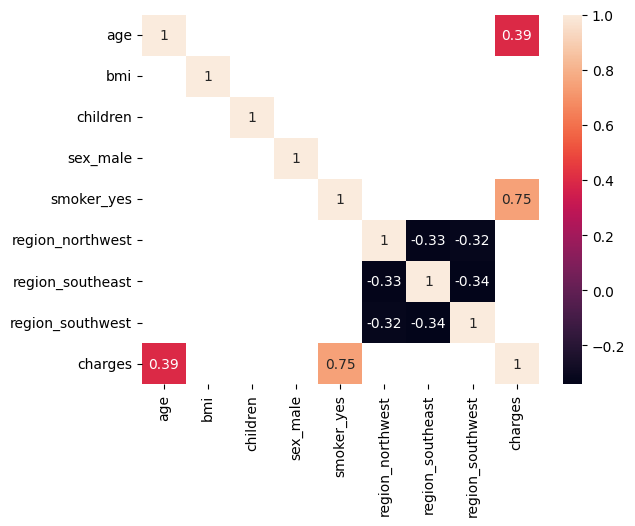

In [ ]:
sns.heatmap(data = temp_df.corr()[abs(temp_df.corr()) > 0.25], annot = True)

In [ ]:
corr_cols = ["smoker_yes", "age", "bmi", "children"]

In [ ]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46.0,19.950,2,0.0,0.0,1.0,0.0,0.0
1285,47.0,24.320,0,0.0,0.0,0.0,0.0,0.0
1142,52.0,24.860,0,0.0,0.0,0.0,1.0,0.0
969,39.0,34.320,5,0.0,0.0,0.0,1.0,0.0
486,54.0,21.470,3,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1044,55.0,35.245,1,1.0,0.0,0.0,0.0,0.0
1095,18.0,31.350,4,0.0,0.0,0.0,0.0,0.0
1130,39.0,23.870,5,0.0,0.0,0.0,1.0,0.0
1294,58.0,25.175,0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.values

array([[46.0, 19.95, 2, ..., 1.0, 0.0, 0.0],
       [47.0, 24.32, 0, ..., 0.0, 0.0, 0.0],
       [52.0, 24.86, 0, ..., 0.0, 1.0, 0.0],
       ...,
       [39.0, 23.87, 5, ..., 0.0, 1.0, 0.0],
       [58.0, 25.175, 0, ..., 0.0, 0.0, 0.0],
       [55.0, 29.9, 0, ..., 0.0, 0.0, 1.0]], dtype=object)

In [ ]:
# calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif = calculate_vif(pd.DataFrame(X_train_std, columns = X_train.columns))
vif.sort_values(by = ["VIF"], ascending = False)

,Variables,VIF
1,bmi,4.976215
0,age,3.010449
6,region_southeast,2.021681
3,sex_male,1.904200
7,region_southwest,1.785557
2,children,1.748673
5,region_northwest,1.695420
4,smoker_yes,1.247346


In [ ]:
# mutual info

from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train, np.sqrt(y_train))
mi_scores

mi = pd.DataFrame()

mi["col_name"] = X_train.columns
mi["mi_score"] = mi_scores

mi_cols = mi.sort_values(by = "mi_score", ascending = False)["col_name"].head()
# for i, col in enumerate(X_train.columns):
#     print(f"Mutual Information between {col} and charges: {mi_scores[i]}")

In [ ]:
mi_cols

,col_name
0,age
4,smoker_yes
3,sex_male
2,children
1,bmi


In [ ]:
X_train_sm

,const,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,1.0,46.0,19.950,2,0.0,0.0,1.0,0.0,0.0
1285,1.0,47.0,24.320,0,0.0,0.0,0.0,0.0,0.0
1142,1.0,52.0,24.860,0,0.0,0.0,0.0,1.0,0.0
969,1.0,39.0,34.320,5,0.0,0.0,0.0,1.0,0.0
486,1.0,54.0,21.470,3,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1044,1.0,55.0,35.245,1,1.0,0.0,0.0,0.0,0.0
1095,1.0,18.0,31.350,4,0.0,0.0,0.0,0.0,0.0
1130,1.0,39.0,23.870,5,0.0,0.0,0.0,1.0,0.0
1294,1.0,58.0,25.175,0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1044,11394.06555
1095,4561.18850
1130,8582.30230
1294,11931.12525


In [ ]:
# p- values
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)


model = sm.OLS(y_train.values, X_train_sm).fit()
model.summary()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
imp_cols = ["age", "bmi", "smoker_yes", "children"]

In [ ]:
result_df = eval("imp_cols", X_train[imp_cols], X_test[imp_cols],
                 np.sqrt(y_train), np.sqrt(y_test), result_df)
result_df

,method,train_mae,test_mae,train_r2,test_r2
0,baseline,4223.843,4141.553,74.21,77.89
1,baseline with standard scaling,4223.843,4141.553,74.21,77.89
2,baseline with mm scaling,4223.843,4141.553,74.21,77.89
3,sqrt transformation,15.078,14.870,77.01,80.66
4,log transformation,0.284,0.272,75.69,80.06
5,pt transformation,0.310,0.299,76.10,80.36
6,imp_cols,15.169,15.067,76.83,80.14


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = (1,2), include_bias = False)

In [ ]:
X_train_poly = poly.fit_transform(X_train[imp_cols])
X_test_poly = poly.transform(X_test[imp_cols])

In [ ]:
result_df = eval("imp_cols with degree 2 poly", X_train_poly, X_test_poly,
                 np.sqrt(y_train), np.sqrt(y_test), result_df)
result_df

,method,train_mae,test_mae,train_r2,test_r2
0,baseline,4223.843,4141.553,74.21,77.89
1,baseline with standard scaling,4223.843,4141.553,74.21,77.89
2,baseline with mm scaling,4223.843,4141.553,74.21,77.89
3,sqrt transformation,15.078,14.870,77.01,80.66
4,log transformation,0.284,0.272,75.69,80.06
5,pt transformation,0.310,0.299,76.10,80.36
6,imp_cols,15.169,15.067,76.83,80.14
7,imp_cols with degree 2 poly,11.730,11.112,82.75,85.49


In [ ]:
poly = PolynomialFeatures(degree = (3,5), include_bias = False)
X_train_poly = poly.fit_transform(X_train[imp_cols])
X_test_poly = poly.transform(X_test[imp_cols])
result_df = eval("imp_cols with degree 3,5 poly", X_train_poly, X_test_poly,
                 np.sqrt(y_train), np.sqrt(y_test), result_df)
result_df

,method,train_mae,test_mae,train_r2,test_r2
0,baseline,4223.843,4141.553,74.21,77.89
1,baseline with standard scaling,4223.843,4141.553,74.21,77.89
2,baseline with mm scaling,4223.843,4141.553,74.21,77.89
3,sqrt transformation,15.078,14.870,77.01,80.66
4,log transformation,0.284,0.272,75.69,80.06
5,pt transformation,0.310,0.299,76.10,80.36
6,imp_cols,15.169,15.067,76.83,80.14
7,imp_cols with degree 2 poly,11.730,11.112,82.75,85.49
8,imp_cols with degree 5 poly,11.032,11.322,84.25,80.95
9,imp_cols with degree 4 poly,11.147,10.697,83.68,86.04


In [ ]:
poly = PolynomialFeatures(degree = (2,5), include_bias = False)
X_train_poly = poly.fit_transform(X_train[imp_cols])
X_test_poly = poly.transform(X_test[imp_cols])

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, np.sqrt(y_train))
y_pred_train_sqrt = model.predict(X_train_poly)
y_pred_test_sqrt = model.predict(X_test_poly)

In [ ]:
mean_absolute_error(y_train, y_pred_train_sqrt**2)

2471.171450974216

In [ ]:
mean_absolute_error(y_test, y_pred_test_sqrt**2)

2271.7260715512593

In [ ]:
imp_cols

['age', 'bmi', 'smoker_yes', 'children']

In [ ]:
age = 25
bmi = 22.65
smoker_yes = 1
children = 0
test_data = np.array([age, bmi, smoker_yes, children])
test_data = poly.transform([test_data])

In [ ]:
test_data = np.array([age, bmi, smoker_yes, children])
test_data = poly.transform([test_data])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
model.predict(test_data)**2

array([15318.53804712])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
imp_cols

['age', 'bmi', 'smoker_yes', 'children']

In [ ]:
cols = ['age', 'bmi', 'smoker', 'children']

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2,
                                       random_state = 42)
print(f"shape of X_train -: {X_train.shape}")
print(f"shape of X_test -: {X_test.shape}")
print(f"shape of y_train -: {y_train.shape}")
print(f"shape of y_test -: {y_test.shape}")

shape of X_train -: (1070, 6)
shape of X_test -: (268, 6)
shape of y_train -: (1070,)
shape of y_test -: (268,)


In [ ]:
X_train[cols]

,age,bmi,smoker,children
560,46,19.950,no,2
1285,47,24.320,no,0
1142,52,24.860,no,0
969,39,34.320,no,5
486,54,21.470,no,3
...,...,...,...,...
1095,18,31.350,no,4
1130,39,23.870,no,5
1294,58,25.175,no,0
860,37,47.600,yes,2


In [ ]:
ct_imputation = ColumnTransformer(transformers=
 [("mean_imputation", SimpleImputer(strategy = "mean"), [0,1]),
  ("mode_imputation", SimpleImputer(strategy = "most_frequent"),[2,3])])
ct_imputation

ColumnTransformer(transformers=[('mean_imputation', SimpleImputer(), [0, 1]),
                                ('mode_imputation',
                                 SimpleImputer(strategy='most_frequent'),
                                 [2, 3])])

In [ ]:
imp_out = ct_imputation.fit_transform(X_train[cols])

In [ ]:
imp_out

array([[46.0, 19.95, 'no', 2],
       [47.0, 24.32, 'no', 0],
       [52.0, 24.86, 'no', 0],
       ...,
       [58.0, 25.175, 'no', 0],
       [37.0, 47.6, 'yes', 2],
       [55.0, 29.9, 'no', 0]], dtype=object)

In [ ]:
ct_ohe = ColumnTransformer(transformers=
 [("ohe", OneHotEncoder(sparse_output = False,drop = "first", handle_unknown="ignore"), [2])],
                           remainder='passthrough')

In [ ]:
ohe_out = ct_ohe.fit_transform(imp_out)

In [ ]:
ohe_out

array([[0.0, 46.0, 19.95, 2],
       [0.0, 47.0, 24.32, 0],
       [0.0, 52.0, 24.86, 0],
       ...,
       [0.0, 58.0, 25.175, 0],
       [1.0, 37.0, 47.6, 2],
       [0.0, 55.0, 29.9, 0]], dtype=object)

In [ ]:
# ct_poly = ColumnTransformer(transformers = [
#     ("poly", PolynomialFeatures(degree = (2,5), include_bias = False), )
# ])

In [ ]:
pipe = Pipeline(steps = [
    ("ct_imp",ct_imputation),
    ("ct_ohe", ct_ohe),
    ("poly", PolynomialFeatures(degree = (2,5), include_bias = False)),
    ("model", LinearRegression())
])

In [ ]:
pipe.fit(X_train[cols], np.sqrt(y_train))

Pipeline(steps=[('ct_imp',
                 ColumnTransformer(transformers=[('mean_imputation',
                                                  SimpleImputer(), [0, 1]),
                                                 ('mode_imputation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2, 3])])),
                ('ct_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [2])])),
                ('poly', PolynomialFeatures(degree=(2, 5), include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
age = 25
bmi = 22.65
smoker_yes = "yes"
children = 0
test_data = np.array([[age, np.nan, smoker_yes, children]])
# test_data = poly.transform([test_data])

In [ ]:
test_data

array([['25', 'nan', 'yes', '0']], dtype='<U32')

In [ ]:
pipe.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([168.31183548])

In [ ]:
X_test[cols]

,age,bmi,smoker,children
764,45,25.175,no,2
887,36,30.020,no,0
890,64,26.885,yes,0
1293,46,25.745,no,3
259,19,31.920,yes,0
...,...,...,...,...
109,63,35.090,yes,0
575,58,27.170,no,0
535,38,28.025,no,1
543,54,47.410,yes,0


In [ ]:
pipe.predict(X_test[cols])

array([ 99.81231566,  74.91747562, 174.58559626,  95.06981693,
       174.01785122,  77.52370561,  42.52013433, 120.33018998,
        60.25519808, 101.20472425, 129.9751234 ,  90.51030034,
        69.13177948, 214.43763048, 220.89335966, 216.71313406,
       103.68270984, 214.69450515,  96.69008935, 160.89858562,
        65.79030701,  94.21261881,  46.863023  ,  57.90450253,
       102.75611566, 107.28685096, 115.24424013,  79.75300466,
       103.05329636,  43.45822925,  95.36046568, 111.04661891,
        55.65396481,  76.25034668,  67.98675361,  90.53540675,
        61.73710389,  89.29791806, 150.36980864, 201.44116116,
        73.88563735,  67.77771566, 117.41051569, 115.27188001,
        81.4671163 , 123.01474654,  78.32457209,  74.58262946,
       210.531495  ,  79.00265794, 118.66944268,  61.19594956,
        85.02360117,  38.99004771, 110.40230643, 108.77222392,
        68.17228867, 197.40007057, 112.3598625 , 105.83101523,
       117.23615678,  70.66485023, 132.22514666,  94.48

In [ ]:
# joblib
import joblib
joblib.dump(pipe, "insurance_joblib")

['insurance_joblib']

In [ ]:
lr2 = joblib.load("insurance_joblib")
lr2

Pipeline(steps=[('ct_imp',
                 ColumnTransformer(transformers=[('mean_imputation',
                                                  SimpleImputer(), [0, 1]),
                                                 ('mode_imputation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [2, 3])])),
                ('ct_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [2])])),
                ('poly', PolynomialFeatures(degree=(2, 5), include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
import pickle
# create an iterator object with write permission - model.pkl
with open('insurance_pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
# load saved model
with open('insurance_pkl' , 'rb') as f:
    lr = pickle.load(f)

lr.coef_